**Evaluation Project 9 - Insurance Claims- Fraud Detection**

By : **HARSH NEMA**

BATCH : **DS052**

**Business case:**

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, we will be working with some auto insurance data to demonstrate how we can create a predictive model that **predicts if an insurance claim is fraudulent or not.**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import warnings # Filtering warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# Seperating columns according to their data type
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

In [5]:
print("Number of rows in the given dataset:",df.shape[0])

print("Number of columns in the given dataset:",df.shape[1])

Number of rows in the given dataset: 1000
Number of columns in the given dataset: 40


In [6]:
# Checking missing values in the dataset
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

**_c39 is an empty column present in the dataset, it is better to drop this column**

In [7]:
df.drop('_c39',axis=1,inplace=True)

**Also in first five rows display, we see ? in some of the columns, let's check its presence**

In [8]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [9]:
# Replacing ? into NaN
df=df.replace('?',np.NaN)

In [10]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

**collision_type**, **property_damage**, and **police_report_available** are categorical variables and imputing the missing values using mode as a strategy

In [11]:
# Imputation of missing values
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [12]:
# Checking mossing values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

**No missing values in the dataset.Great to go ahead**

**policy_bind_date** and **incident_date** has object data type hence we will convert it into datetime datatype

In [13]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

**Extracting day, month and year from policy_bind_date and incident_date**

In [14]:
# Splitting date into day,month and year for policy_bind_date

df['policy_bind_Day']=df['policy_bind_date'].dt.day
df['policy_bind_Month']=df['policy_bind_date'].dt.month
df['policy_bind_Year']=df['policy_bind_date'].dt.year

In [15]:
# Splitting date into day,month and year for incident_date

df['incident_Day']=df['incident_date'].dt.day
df['incident_Month']=df['incident_date'].dt.month
df['incident_Year']=df['incident_date'].dt.year

Dropping **policy_bind_date** and **incident_date**  

In [16]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

Looking at the column **policy_csl**, there are two values seperated by /.

**Combined single limits** are a provision of an insurance policy that limits the coverage for all components of a claim to a single dollar amount. A combined single limit policy has a maximum dollar amount that covers any **combination of injuries or property damage** in an incident.

In [17]:
df['csl_bodily_injury']=df['policy_csl'].str.split('/',expand=True)[0]
df['csl_property_damage']=df['policy_csl'].str.split('/',expand=True)[1]

In [18]:
#Dropping policy_csl column
df.drop('policy_csl',axis=1,inplace=True)

In [19]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year,csl_bodily_injury,csl_property_damage
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,...,2004,Y,17,10,2014,25,1,2015,250,500
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,...,2007,Y,27,6,2006,21,1,2015,250,500
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,...,2007,N,9,6,2000,22,2,2015,100,300
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,...,2014,Y,25,5,1990,1,10,2015,250,500
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,...,2009,N,6,6,2014,17,2,2015,500,1000


In [20]:
df['incident_Year'].unique()

array([2015])

**All the claims in the above dataset belongs to year 2015 as incident_year has single value 2015 and hence we will drop this column**

In [21]:
df.drop('incident_Year',axis=1,inplace=True)

**EDA**

In [22]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_Day', 'policy_bind_Month', 'policy_bind_Year', 'incident_Day', 'incident_Month'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'csl_bodily_injury', 'csl_property_damage']}

In [23]:
catg = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type',
        'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage',
        'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

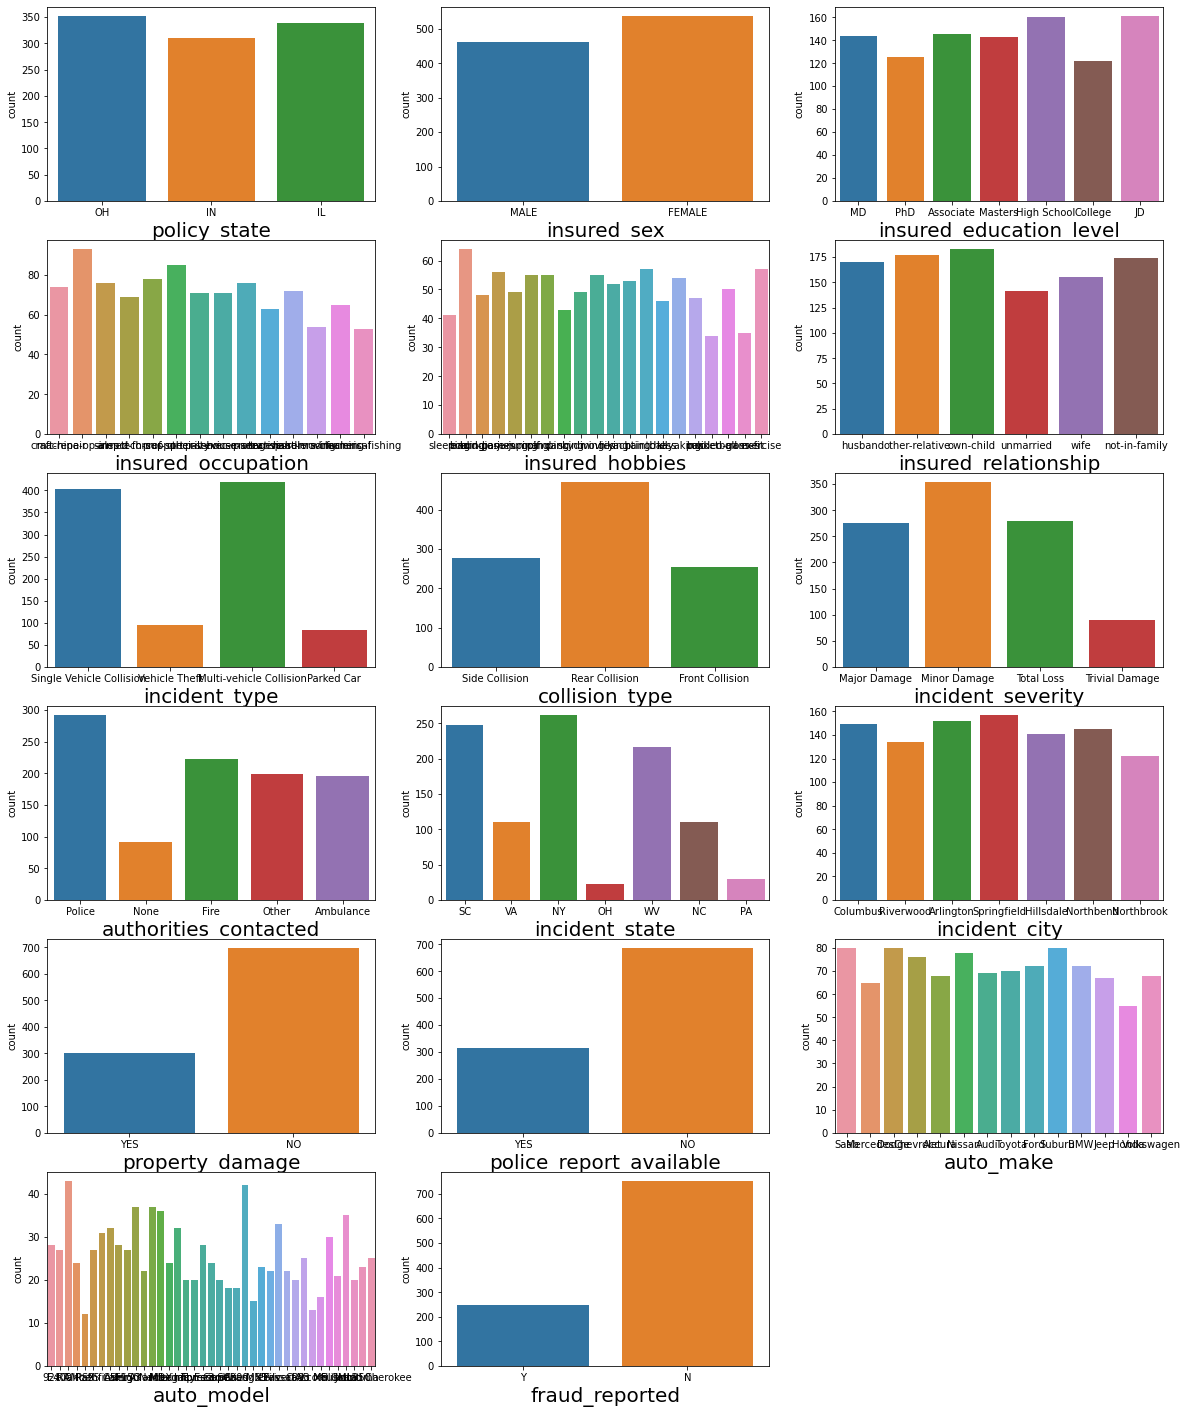

In [24]:
plt.figure(figsize=(20,25),facecolor='w')
plotnumber=1
for column in catg:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [25]:
for i in catg:
    print(i)
    print(df[i].value_counts())
    print("="*150)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

In [26]:
df[catg].describe().T

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354
authorities_contacted,1000,5,Police,292


**Fraud reported Vs Gender**

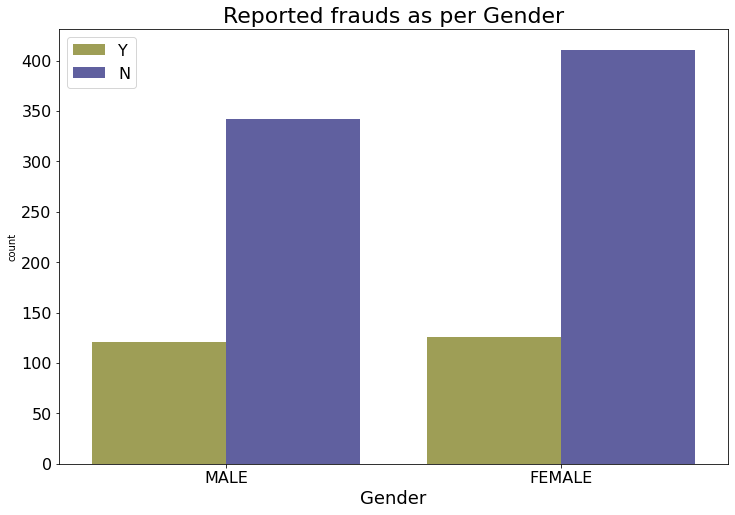

In [28]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['insured_sex'], hue=df['fraud_reported'], palette='gist_stern_r')
plt.title('Reported frauds as per Gender', fontsize=22)
p.set_xlabel('Gender',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Almost equal number of frauds were reported for both male and female**

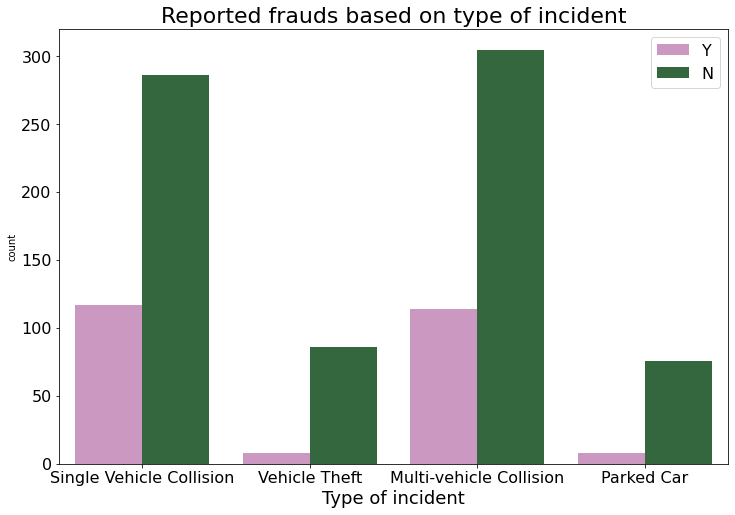

In [29]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['incident_type'], hue=df['fraud_reported'], palette='cubehelix_r')
plt.title('Reported frauds based on type of incident', fontsize=22)
p.set_xlabel('Type of incident',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

As obvious more number of observations were present for **Single and multi vehicle collision**,more number of frauds reported for both type of incident

In [37]:
pd.crosstab(df['incident_type'], df['incident_severity']).style.background_gradient(cmap='CMRmap_r')

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
incident_type,,,,
Multi-vehicle Collision,144,130,145,0
Parked Car,0,42,0,42
Single Vehicle Collision,132,136,135,0
Vehicle Theft,0,46,0,48


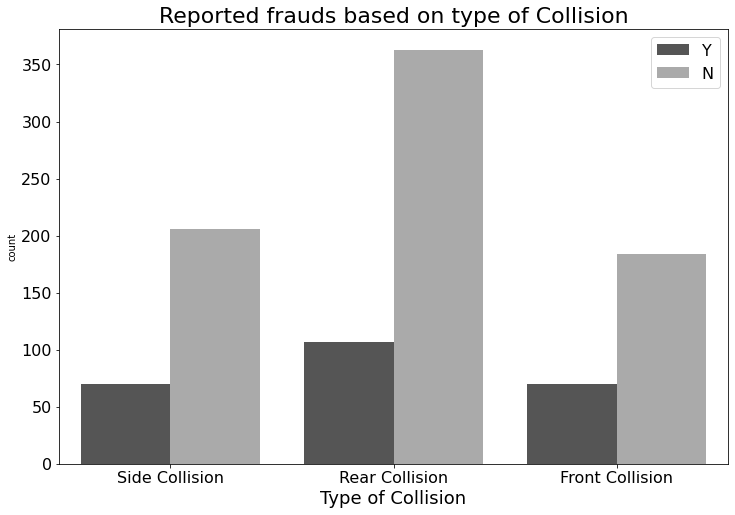

In [30]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['collision_type'], hue=df['fraud_reported'], palette='gist_yarg_r')
plt.title('Reported frauds based on type of Collision', fontsize=22)
p.set_xlabel('Type of Collision',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Almost same number of frauds were reported for Side and Front collision and more frauds were reported for rear type of collision**

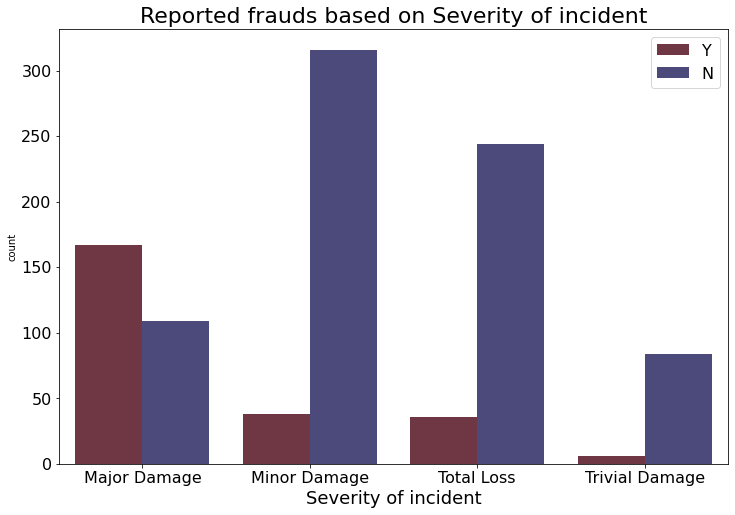

In [31]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['incident_severity'], hue=df['fraud_reported'], palette='icefire_r')
plt.title('Reported frauds based on Severity of incident', fontsize=22)
p.set_xlabel('Severity of incident',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**More number of frauds were reported for Major damage as a severity of incident**

**Minor Damage and Total Loss reports almost equal number of fraud claims**

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [33]:
num = ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_Day', 'policy_bind_Month', 'policy_bind_Year', 'incident_Day', 
       'incident_Month','policy_annual_premium','csl_bodily_injury', 'csl_property_damage']

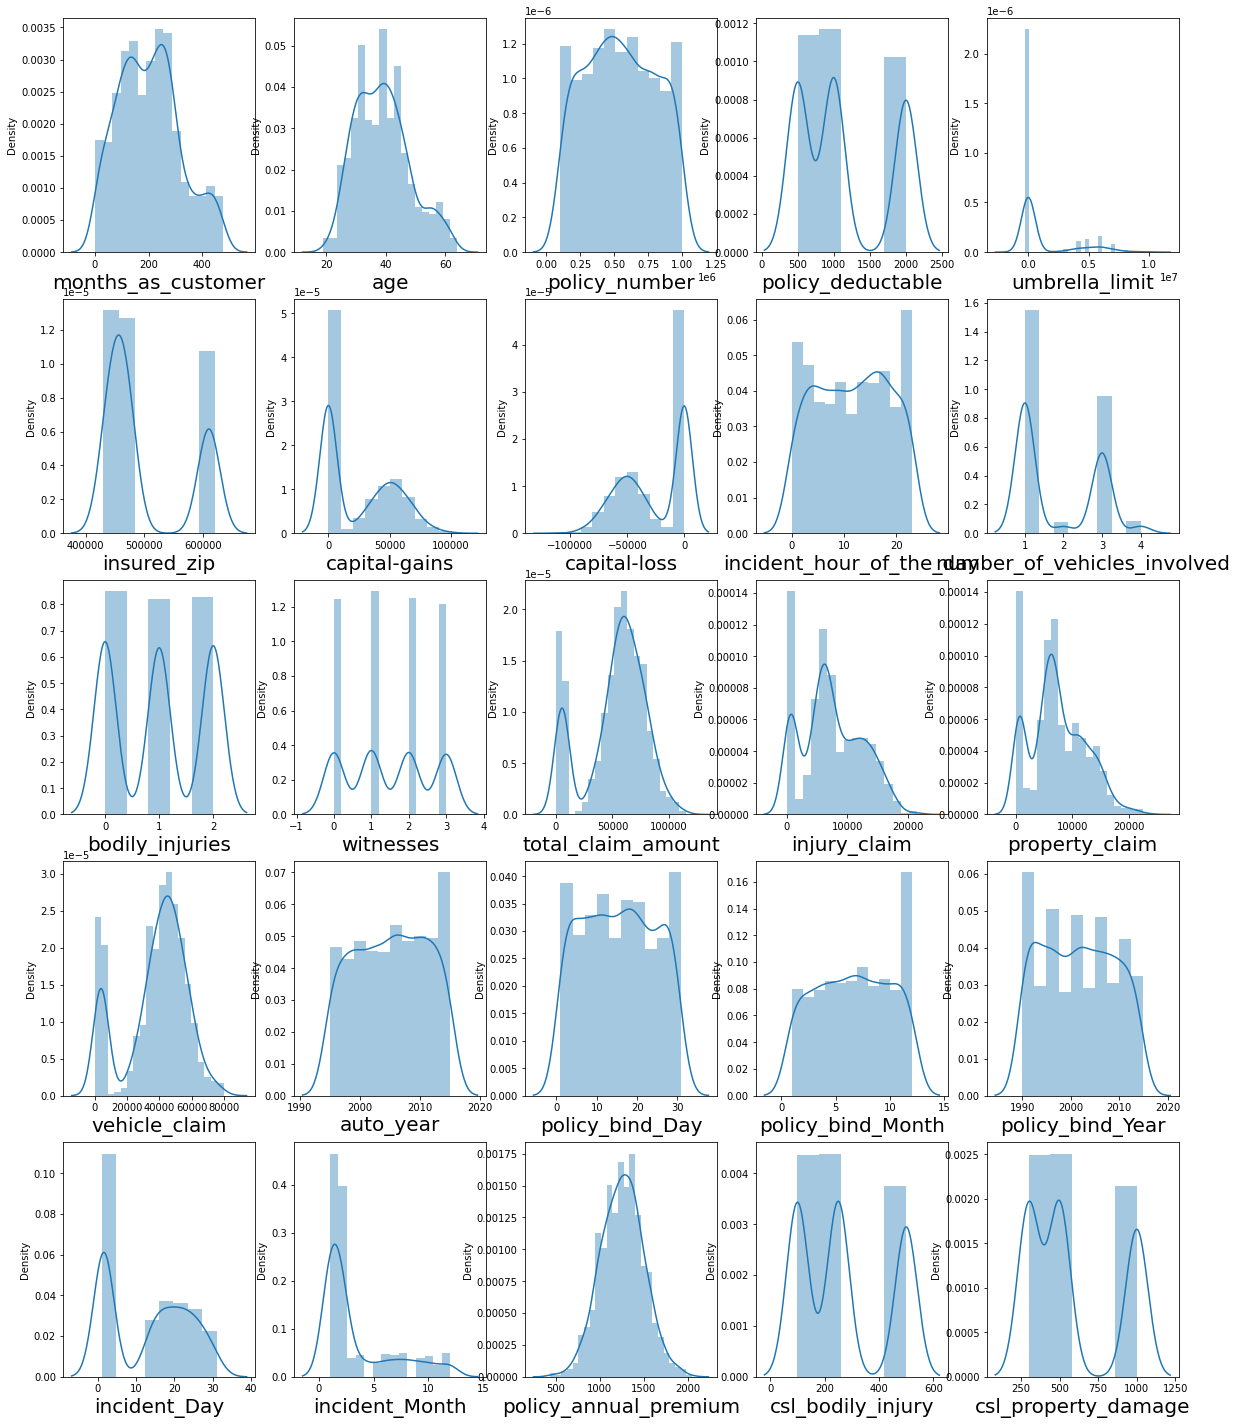

In [36]:
plt.figure(figsize=(20,25),facecolor='w')
plotnumber=1
for column in num:
    if plotnumber<=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* Most of the variables follow normal distribution curve

* **umbrella_limit**, **insured_zip** and **incident_month** are positively skewed

* **total_claim_amount** and **vehicle_claim** are negatively skewed

In [38]:
#Checking skewness in the dataset
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_Day                0.024372
policy_bind_Month             -0.029321
policy_bind_Year               0.052511
incident_Day                   0.059111
incident_Month                 1.375894
csl_bodily_injury              0.410015
csl_property_damage            0.605587


**Skewness permissible limit is +/- 0.5**

Features outside the permissible limit:

* umbrella_limit

* insured_zip

* number_of_vehicles_involved

* total_claim_amount

* incident_month

* csl_property_damage

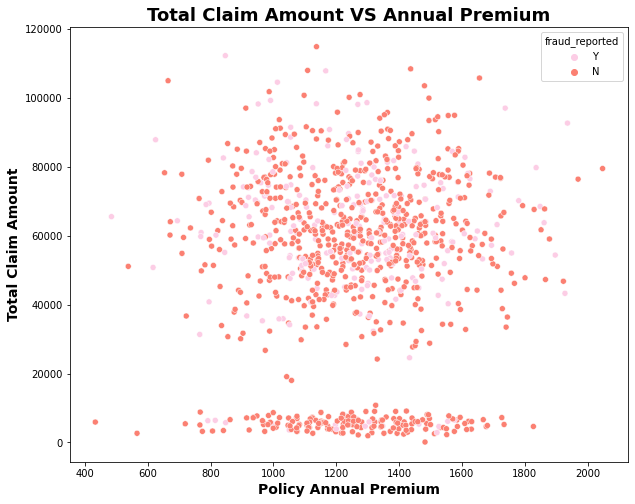

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df['fraud_reported'], palette = 'Set3_r')
plt.title('Total Claim Amount VS Annual Premium',fontsize=18,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=14,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=14,fontweight='bold')
plt.show()

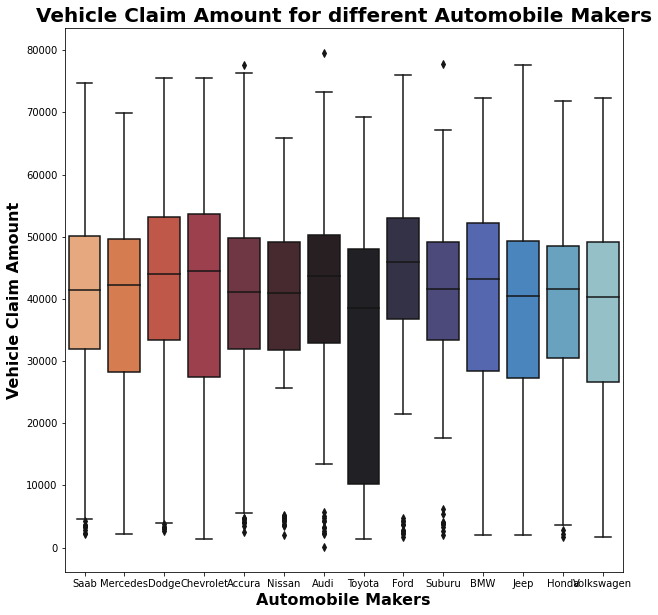

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(df['auto_make'], df['vehicle_claim'], palette = 'icefire_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

**Toyata** auto vehicles have more claim amount compared to other auto makers

**Chevrolet**, **BMW**, **Jeep**, **Volkswagen** and **Mercedes** follows the list

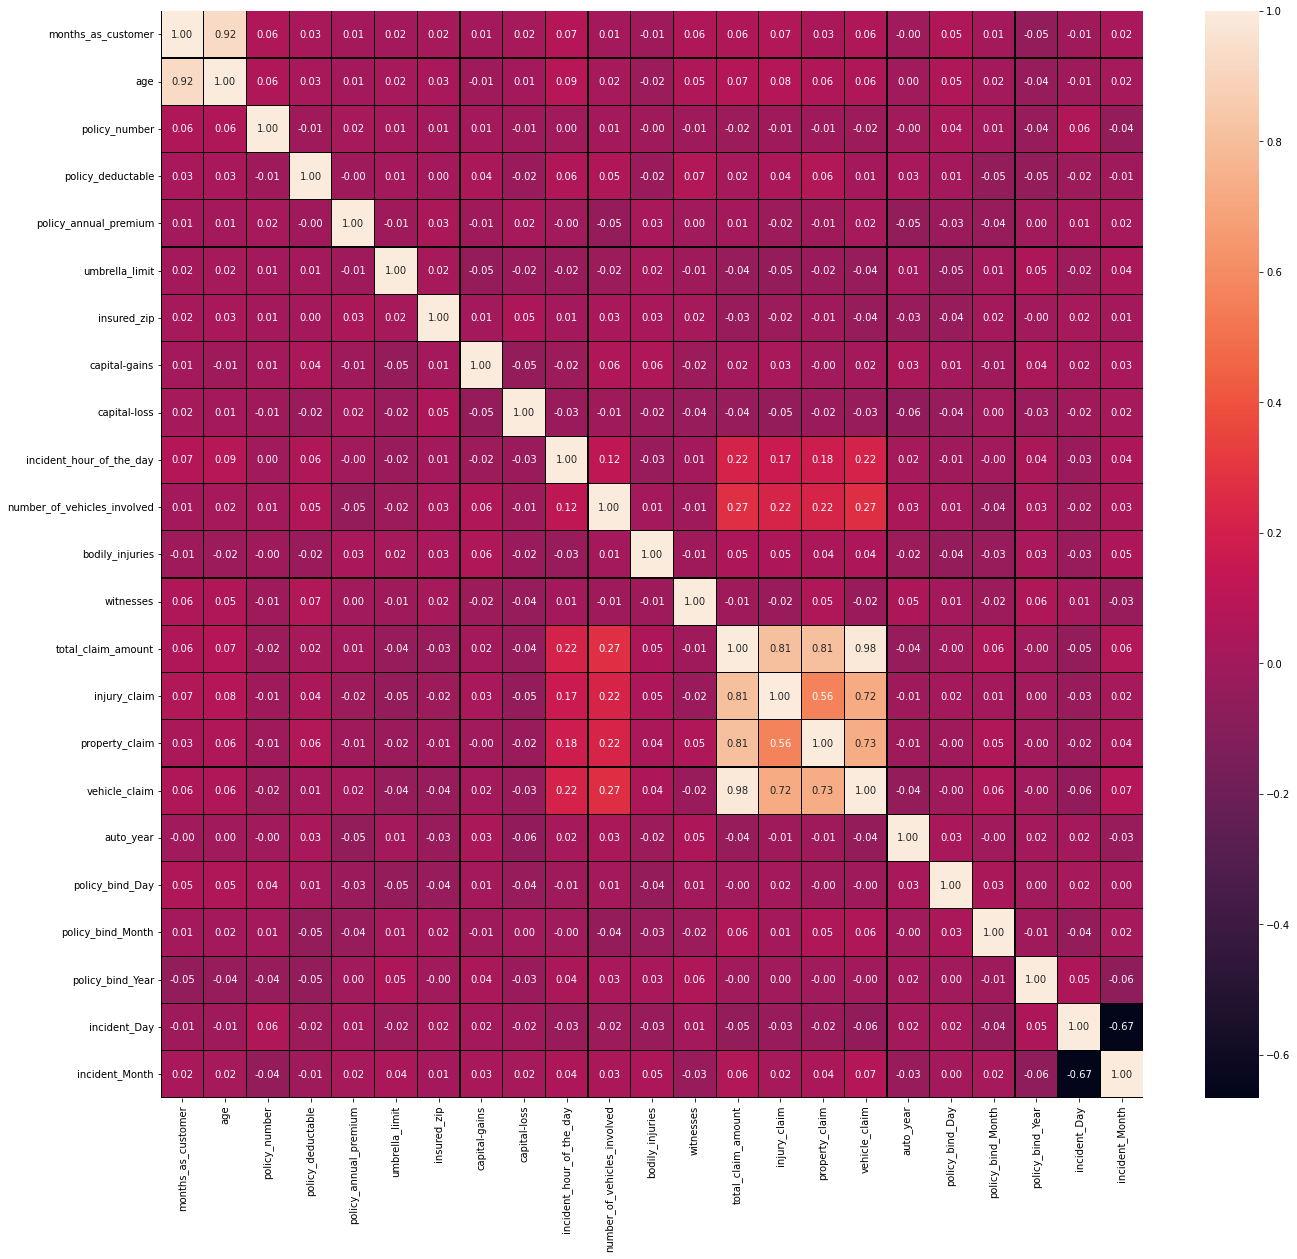

In [44]:
# Plotting heatmap and checking correlation

plt.figure(figsize=(22,20))
sns.heatmap(df.corr(),annot =True,linewidths=0.15,linecolor='black',fmt="0.2f")

* **Multicollinearity exists in the dataset**

* **vehicle_claim and total_claim_amount** has strong correlation 

* **injury_claim and property_claim** are also strongly correlated with total_claim_amount

* Need to apply PCA to reduce the effect of multicollinearity


**Encoding the Categorical Variables**

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
for i in catg:
    df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [48]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,csl_bodily_injury,csl_property_damage
0,328,48,521585,2,1000,1406.91,0,466132,1,4,...,1,2004,1,17,10,2014,25,1,250,500
1,228,42,342868,1,2000,1197.22,5000000,468176,1,4,...,12,2007,1,27,6,2006,21,1,250,500
2,134,29,687698,2,2000,1413.14,5000000,430632,0,6,...,30,2007,0,9,6,2000,22,2,100,300
3,256,41,227811,0,2000,1415.74,6000000,608117,0,6,...,34,2014,1,25,5,1990,1,10,250,500
4,228,44,367455,0,1000,1583.91,6000000,610706,1,0,...,31,2009,0,6,6,2014,17,2,500,1000


In [58]:
df['incident_location'].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

In [59]:
# Dropping incident location as it is not relevant in predicting fraudlent detection
df= df.drop(['incident_location'],axis=1)

In [60]:
df.shape

(1000, 42)

**Skewness Reduction**

In [50]:
# Considering skewness reduction through PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [61]:
# Seperating features and target variable for fraudlent detection task

X = df.drop('fraud_reported',axis=1)

y = df['fraud_reported']

In [62]:
# Applying Power transformer

X_new_pt = pt.fit_transform(X)

# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X = pd.DataFrame(X_new_pt,columns= X.columns)

# Checking Skewness

X.skew().sort_values(ascending=False)

property_damage                0.863806
police_report_available        0.802728
number_of_vehicles_involved    0.363693
incident_Month                 0.306468
insured_sex                    0.148630
csl_property_damage            0.109377
capital-loss                   0.090488
capital-gains                  0.038722
policy_bind_Year               0.034584
policy_deductable              0.023988
policy_annual_premium          0.004758
insured_zip                    0.000000
age                           -0.001945
auto_year                     -0.012491
csl_bodily_injury             -0.034227
incident_severity             -0.079282
incident_type                 -0.088766
bodily_injuries               -0.128799
collision_type                -0.129334
months_as_customer            -0.135661
policy_state                  -0.145377
witnesses                     -0.153648
policy_number                 -0.160374
insured_relationship          -0.160421
policy_bind_Month             -0.171414


* All continuous variables have skewness within the permissible limit and it is irrelevant for categorical variables

**TARGET VARIABLE**

In [45]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

**Data is imbalanced, need to balance it using SMOTE**

In [63]:
from imblearn.over_sampling import SMOTE
over_smp = SMOTE(0.8)

In [64]:
print("The number of target classes before fit{}".format(Counter(y)))

The number of target classes before fitCounter({0: 753, 1: 247})


In [65]:
X,y = over_smp.fit_resample(X,y)
print("The number of target classes after fit{}".format(Counter(y)))

The number of target classes after fitCounter({0: 753, 1: 602})


**Scaling using Standard Scaler**

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaler = scaler.fit_transform(X)

In [67]:
# Checking multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaler,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,4.968970,months_as_customer
1,4.955638,age
2,1.055797,policy_number
3,1.055294,policy_state
4,1.060089,policy_deductable
5,1.058406,policy_annual_premium
6,1.043342,umbrella_limit
7,NaN,insured_zip
8,1.049170,insured_sex
9,1.051968,insured_education_level


**Multicollinearity is present in the dataset**

We will apply PCA to deal with multicollinearity

**PRINCIPAL COMPONENT ANALYSIS**

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaler)

array([[ 6.94509521e-01, -4.05306254e-01,  4.41671982e-01, ...,
        -1.92169590e-02,  4.88526252e-02,  5.22816209e-16],
       [-4.21874064e+00,  2.01924958e-01,  1.59362401e-01, ...,
         3.20291723e-02,  6.24809762e-02,  3.65868728e-17],
       [-6.85151063e-01,  4.30744225e-01, -1.62782609e+00, ...,
        -3.87070246e-02, -3.60068358e-02,  2.40098581e-17],
       ...,
       [ 4.39792734e-01,  7.19355194e-01, -1.10680391e+00, ...,
        -4.99458600e-02, -3.26236208e-02, -1.35592539e-17],
       [-8.11777411e-01, -5.38269316e-01, -3.37919453e-01, ...,
         9.47563358e-03,  6.28620203e-02,  2.46640885e-16],
       [ 3.00629247e-02,  1.31269014e+00, -2.26568465e+00, ...,
        -5.31730373e-02, -1.23511137e-02, -4.21948277e-17]])

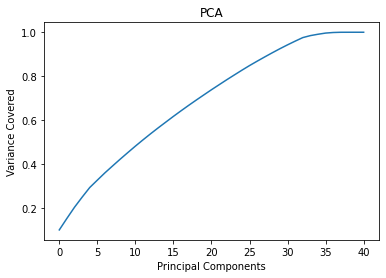

In [69]:
# Lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

**Around 32 components are able to explain more than 95% variance in the dataset,so it's safe to consider 32 PC's**

In [70]:
pca = PCA(n_components=32)
new_pcomp = pca.fit_transform(X_scaler)
X_pca = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16',
                                             'PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28',
                                             'PC29','PC30','PC31','PC32'])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,0.694510,-0.405306,0.441672,-0.047654,2.751746,2.293110,-1.958177,-1.395449,0.482024,-0.689715,...,0.885590,-0.194008,0.241890,1.154523,-1.468819,-0.275978,0.002320,1.310925,-0.272677,-0.504239
1,-4.218741,0.201925,0.159362,0.599835,1.042796,-0.235409,0.856284,-1.314631,-0.248934,-0.113648,...,-0.227020,-0.012506,0.348574,0.154029,0.543369,-1.031763,1.084060,0.015379,-1.554180,-0.558698
2,-0.685151,0.430744,-1.627826,1.313150,-0.718016,-1.715136,1.102242,1.094404,0.297877,-1.071754,...,1.195793,-0.560139,0.759178,1.010132,0.629592,-0.054413,-0.222496,-0.883477,-0.423674,0.997718
3,0.182643,1.741034,1.777248,-1.439321,-1.562479,-2.952481,1.618193,-0.042759,0.058333,1.156442,...,0.770837,-1.311977,-0.999709,0.263095,-1.913550,0.529315,-0.762519,-0.175549,-0.180024,1.469681
4,-3.620043,-0.275983,2.046047,0.364434,0.131695,-1.975794,0.682735,2.218876,-0.740713,1.236999,...,-1.046520,0.280202,0.551630,-0.670992,-1.970407,1.067366,1.116687,0.171255,-0.404861,0.287509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,0.990745,-2.432391,-1.973653,1.459944,0.302748,-1.647257,1.259241,0.772974,-1.016292,1.449633,...,0.465403,1.365263,-0.533862,-1.293556,-0.062491,0.461931,1.097468,0.026812,-0.423169,0.510095
1351,1.813721,-0.670001,1.142738,-1.101325,-1.785339,1.157478,0.100272,-0.176317,-0.409100,-0.769270,...,-1.119790,-0.840868,0.504088,0.748581,-0.980246,-0.752817,0.663455,-0.066135,0.689508,0.305032
1352,0.439793,0.719355,-1.106804,1.937954,0.497837,-1.137860,0.712421,0.489435,-1.505525,-1.188215,...,0.462355,0.353426,1.165863,-1.031776,0.065444,-0.273484,-1.353338,0.274690,0.152477,0.435356
1353,-0.811777,-0.538269,-0.337919,-1.674876,0.202500,1.187884,1.844237,-0.903082,0.893686,-0.222074,...,-0.950446,1.223566,0.047282,-0.079917,-1.385228,-0.965511,-0.249717,-0.382790,-0.695022,-0.536531


**MODEL BUILDING - FRAUDULENT DETECTION CLASSIFICATION TASK**

In [71]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV

**DEFINING FUNCTION FOR CALCULATING MODEL PERFORMANCE**

In [72]:
# Defining function for calculating the performance of the classification model

def metric_score(clf,X_train,X_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("-----------------Train Result--------------------")
        
        print(f"Train Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        
        pred = clf.predict(X_test)
        
        matrix = confusion_matrix(y_test,pred)
        
        print("-----------------Test Result--------------------")
        
        print("=====Confusion Matrix======= \n",matrix)
        
        print(f"Test Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n Test Classification Report \n ", classification_report(y_test,pred,digits =2))

**BEST RANDOM STATE**

In [73]:
from sklearn.model_selection import train_test_split
maxAccu = 0 # Max Accuracy
maxRS = 0   # Best random state for which maximum accuracy is achieved

for i in range(0,1000):
    X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=i)
  
    lr = LogisticRegression()
    
    lr.fit(X_train,y_train)    # Training the model
   
    pred_lr = lr.predict(X_test)    # Predicting the target variable
 
    acc_lr = accuracy_score(y_test,pred_lr)
  
    if acc_lr>maxAccu:
    
        maxAccu = acc_lr
        
        maxRS = i
        
print("Maximum Accuracy:",maxAccu,"at random state ", maxRS)

Maximum Accuracy: 0.7896678966789668 at random state  494


**TRAIN TEST SPLIT USING BEST RANDOM STATE**

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=494)

**LOGISTIC REGRESSION**

In [75]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,X_pca,y,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 71.59%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[123  31]
 [ 26  91]]
Test Accuracy Score : 78.97%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.83      0.80      0.81       154
           1       0.75      0.78      0.76       117

    accuracy                           0.79       271
   macro avg       0.79      0.79      0.79       271
weighted avg       0.79      0.79      0.79       271

Cross validation score of Logistic regression model : 71.66051660516605


**Tuning parameters for Logistic Regression**

In [76]:
lr_params = {'penalty':['l1', 'l2'],
             'tol':[0.0001,0.001,0.01],
             'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'multi_class':['auto', 'ovr', 'multinomial']}

grd_lr = GridSearchCV(lr,param_grid = lr_params, n_jobs =-1)

grd_lr.fit(X_train,y_train)

print("Best parameters : ",grd_lr.best_params_)

Best parameters :  {'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


In [77]:
lr = grd_lr.best_estimator_

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,X_pca,y,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 71.86%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[123  31]
 [ 25  92]]
Test Accuracy Score : 79.34%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.83      0.80      0.81       154
           1       0.75      0.79      0.77       117

    accuracy                           0.79       271
   macro avg       0.79      0.79      0.79       271
weighted avg       0.80      0.79      0.79       271

Cross validation score of Logistic regression model : 71.58671586715867


**KNN Classifier**

In [78]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,X_pca,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 75.28%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[ 73  81]
 [  5 112]]
Test Accuracy Score : 68.27%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.94      0.47      0.63       154
           1       0.58      0.96      0.72       117

    accuracy                           0.68       271
   macro avg       0.76      0.72      0.68       271
weighted avg       0.78      0.68      0.67       271

Cross validation score of K Neighbors Classifier model : 67.30627306273063


**Tuning parameters for KNN**

In [79]:
 knn_params = { 'n_neighbors':[4,5,6],
        'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','brute'],
    'leaf_size':[25,30]}

grd_knn = GridSearchCV(knn,param_grid = knn_params, n_jobs =-1)

grd_knn.fit(X_train,y_train)

print("Best parameters : ",grd_knn.best_params_)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4, 'weights': 'uniform'}


In [80]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,X_pca,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 85.89%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[ 89  65]
 [ 11 106]]
Test Accuracy Score : 71.96%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.89      0.58      0.70       154
           1       0.62      0.91      0.74       117

    accuracy                           0.72       271
   macro avg       0.75      0.74      0.72       271
weighted avg       0.77      0.72      0.72       271

Cross validation score of K Neighbors Classifier model : 73.50553505535056


**DECISION TREE CLASSIFIER**

In [81]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,X_pca,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 100.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[115  39]
 [ 27  90]]
Test Accuracy Score : 75.65%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.81      0.75      0.78       154
           1       0.70      0.77      0.73       117

    accuracy                           0.76       271
   macro avg       0.75      0.76      0.75       271
weighted avg       0.76      0.76      0.76       271

Cross validation score of Decision Tree Classifier model : 72.54612546125462


**Tuning parameters for Decision Tree**

In [82]:
grid_param = {'criterion':['gini','entropy'],
              'max_depth': range(9,15),
              'min_samples_leaf': range(2,7),
              'min_samples_split': range(2,6)
             }

grid_search = GridSearchCV(estimator = dt, param_grid = grid_param,n_jobs =-1)

grid_search.fit(X_train,y_train)

print("Best parameters : ",grid_search.best_params_)

Best parameters :  {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [83]:
dt = grid_search.best_estimator_

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,X_pca,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 96.86%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[119  35]
 [ 29  88]]
Test Accuracy Score : 76.38%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.80      0.77      0.79       154
           1       0.72      0.75      0.73       117

    accuracy                           0.76       271
   macro avg       0.76      0.76      0.76       271
weighted avg       0.77      0.76      0.76       271

Cross validation score of Decision Tree Classifier model : 73.50553505535056


**RANDOM FOREST CLASSIFIER**

In [84]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)      # Model training

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,X_pca,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 100.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[144  10]
 [ 26  91]]
Test Accuracy Score : 86.72%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.85      0.94      0.89       154
           1       0.90      0.78      0.83       117

    accuracy                           0.87       271
   macro avg       0.87      0.86      0.86       271
weighted avg       0.87      0.87      0.87       271

Cross validation score of Random Forest Classifier model : 86.49446494464945


**Tuning parameters for Random Forest**

In [85]:
params_rf = {'criterion':['gini','entropy'],
         'max_depth': [10,12,25,30],
         'min_samples_split' :[2,3,4],
         'min_samples_leaf' :[2,3,4,5]}

grd_rf = GridSearchCV(rf,param_grid = params_rf,n_jobs =-1)

grd_rf.fit(X_train,y_train)

print("Best parameters : ",grd_rf.best_params_)

Best parameters :  {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [86]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,X_pca ,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 100.00%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[142  12]
 [ 25  92]]
Test Accuracy Score : 86.35%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.85      0.92      0.88       154
           1       0.88      0.79      0.83       117

    accuracy                           0.86       271
   macro avg       0.87      0.85      0.86       271
weighted avg       0.87      0.86      0.86       271

Cross validation score of Random Forest Classifier model : 85.31365313653137


**SUPPORT VECTOR CLASSIFIER**

In [87]:
svc = SVC()

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,X_pca,y,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 94.83%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[131  23]
 [ 23  94]]
Test Accuracy Score : 83.03%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.85      0.85      0.85       154
           1       0.80      0.80      0.80       117

    accuracy                           0.83       271
   macro avg       0.83      0.83      0.83       271
weighted avg       0.83      0.83      0.83       271

Cross validation score of Support Vector Classifier model : 82.2140221402214


**Tuning parameters for SVC**

In [88]:
svc_params = {'kernel':['rbf','linear','poly','sigmoid'],
              'gamma':['scale','auto'],
              'decision_function_shape':['ovr','ovo']
              }

grd_svc = GridSearchCV(svc,param_grid = svc_params,n_jobs =-1)

grd_svc.fit(X_train,y_train)

print("Best parameters : ",grd_svc.best_params_)

Best parameters :  {'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf'}


In [89]:
svc = grd_svc.best_estimator_

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,X_pca,y,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 96.86%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[139  15]
 [ 23  94]]
Test Accuracy Score : 85.98%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.86      0.90      0.88       154
           1       0.86      0.80      0.83       117

    accuracy                           0.86       271
   macro avg       0.86      0.85      0.86       271
weighted avg       0.86      0.86      0.86       271

Cross validation score of Support Vector Classifier model : 83.83763837638377


**PLOTTING ROC AUC CURVE**

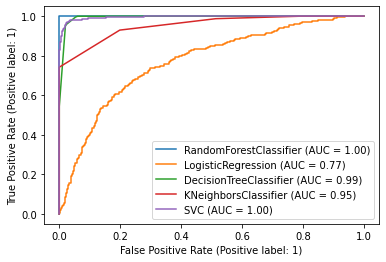

In [90]:
# Plotting ROC AUC curve on training data

disp = plot_roc_curve(rf,X_train,y_train)

plot_roc_curve(lr,X_train,y_train,ax=disp.ax_)

plot_roc_curve(dt,X_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,X_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,X_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

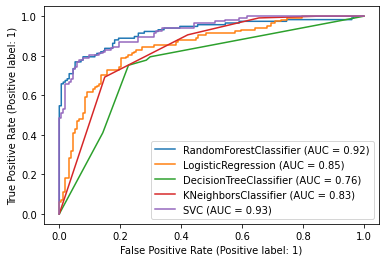

In [91]:
# Plotting ROC AUC curve on test data

disp = plot_roc_curve(rf,X_test,y_test)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

**Acoording to ROC AUC Curve, SVC shows minimum difference between training and test accuracy and hence can be considered to be the best model among all the above**

**SAVING THE MODEL FOR FRAUDULENT DETECTION**

In [92]:
filename = 'fraudulent_detection_clf.pkl'
pickle.dump(svc,open(filename,'wb'))

**CONCLUSION**

In [93]:
loaded_model = pickle.load(open('fraudulent_detection_clf.pkl','rb'))

pred_svc = loaded_model.predict(X_test)

result = accuracy_score(y_test,pred_svc)

print(result*100)

85.97785977859779


In [94]:
conclusion = pd.DataFrame([pred_svc,y_test],index=['Predicted','Original'])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
Predicted,1,0,0,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1,0
Original,1,0,1,0,0,0,1,0,1,0,...,1,1,0,1,0,1,1,1,1,1
